In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch.nn.functional

In [2]:
data = pd.read_csv("../data/raw.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
n_augmentations = 2  # Số lần nhân bản và nhòe ảnh (có thể điều chỉnh)

# Dữ liệu mới sau khi nhân bản và nhòe ảnh
augmented_data = []

for index, row in data.iterrows():
    # Lấy cột label
    label = row['label']
    
    # Lấy các giá trị pixel từ hàng hiện tại
    pixels = row.drop('label').values

    for i in range(n_augmentations):
        # Tạo một bản sao của ảnh
        augmented_pixels = pixels.copy()
        
        # Nhòe ảnh bằng OpenCV
        augmented_pixels = np.array(augmented_pixels, dtype=np.uint8).reshape(28, 28)
        augmented_pixels = cv2.resize(augmented_pixels, (14, 14), interpolation=cv2.INTER_LINEAR)
        augmented_pixels = cv2.resize(augmented_pixels, (28, 28), interpolation=cv2.INTER_LINEAR)
        augmented_pixels = augmented_pixels.flatten()

        # Thêm dữ liệu mới vào danh sách augmented_data
        augmented_data.append(np.insert(augmented_pixels, 0, label))

# Tạo DataFrame mới từ dữ liệu đã được nhân bản và nhòe ảnh
augmented_df = pd.DataFrame(augmented_data, columns=data.columns)

augmented_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83995,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X = augmented_df.iloc[:, 1:]
Y = augmented_df.iloc[:, 0]
X.shape

(84000, 784)

In [74]:
Y = torch.tensor(Y, dtype=torch.long)


In [75]:
one_hot_y = torch.zeros(len(Y), 10)
one_hot_y.scatter_(1, Y.view(-1, 1), 1)

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [76]:
Y = one_hot_y.numpy()

In [77]:
X.shape, Y.shape

((84000, 784), (84000, 10))

In [78]:
X = X.to_numpy().reshape(-1,28,28,1)
X.shape

(84000, 28, 28, 1)

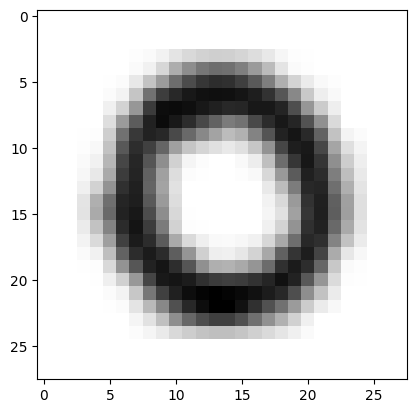

In [79]:
plt.imshow(X[3], cmap=plt.cm.binary)
plt.show()

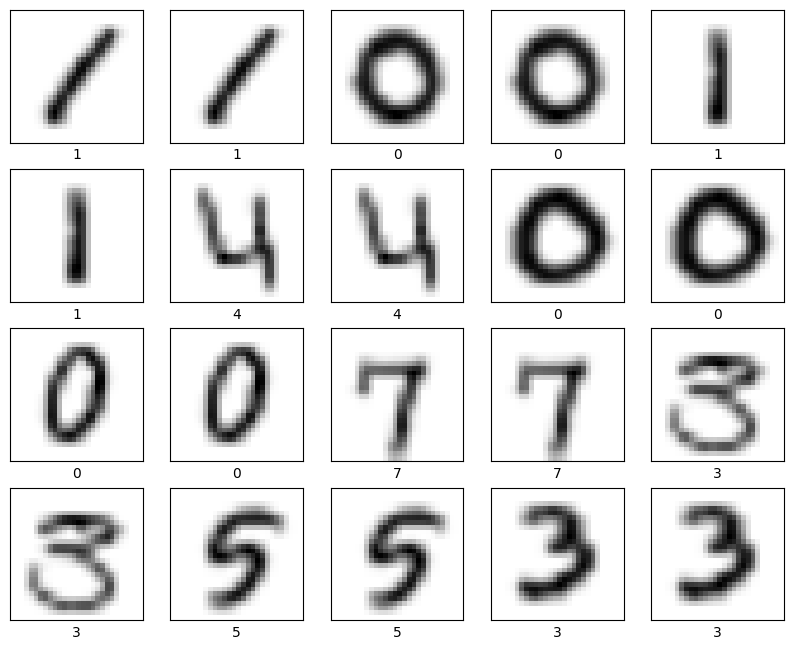

In [80]:
import math
numbers_to_display = 20
num_cells = math.ceil(math.sqrt(numbers_to_display))

plt.figure(figsize = (10, 10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(Y[i]))
# plt.show()

In [81]:
augmented_df.to_csv('../data/blur_images.csv', index=False)